In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('multiple_linear_regression_dataset.csv')

In [3]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [4]:
df.isnull().sum()

age           0
experience    0
income        0
dtype: int64

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
print(x.head())

   age  experience
0   25           1
1   30           3
2   47           2
3   32           5
4   43          10


In [7]:
import seaborn as sns

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

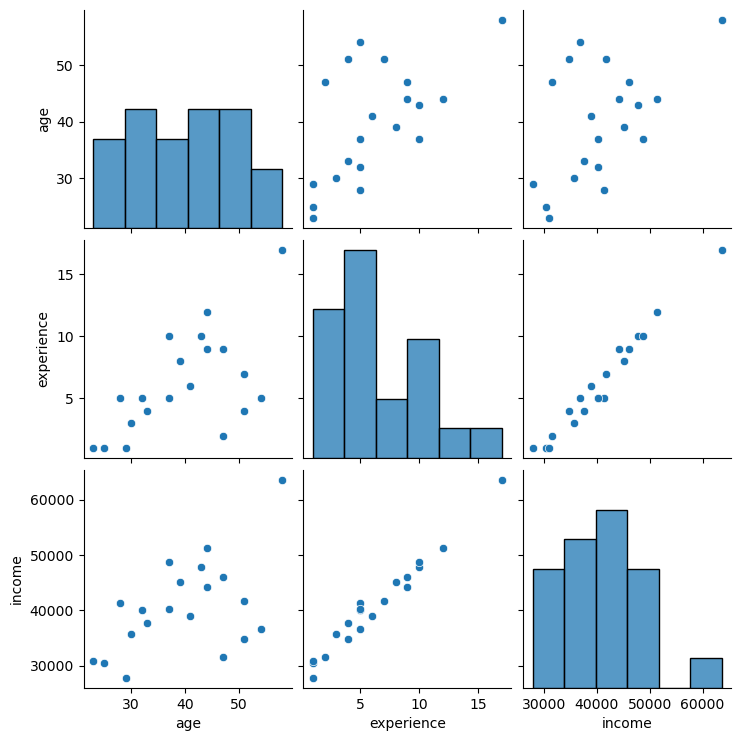

In [8]:
sns.pairplot(df)

In [10]:
corr_matrix=df.corr()
corr_matrix.style.background_gradient(cmap='PuBu')

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='income'>

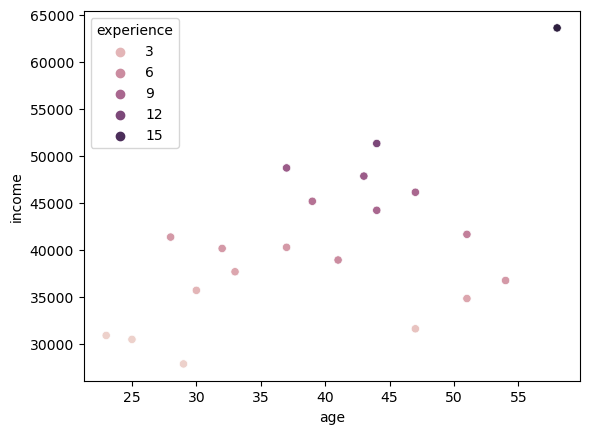

In [48]:
sns.scatterplot(data=df,x='age',y='income',hue='experience')

<Axes: xlabel='age', ylabel='income'>

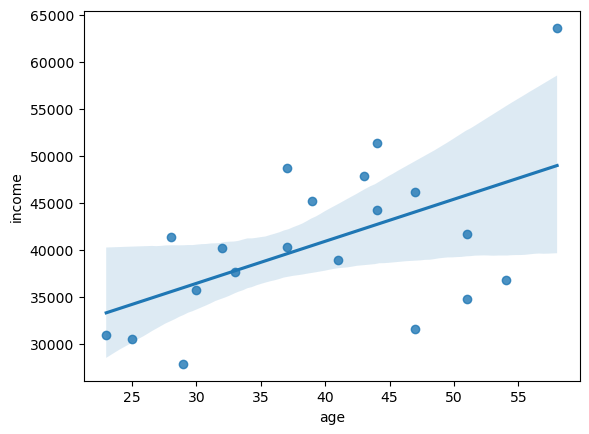

In [46]:
sns.regplot(data=df,x='age',y='income')

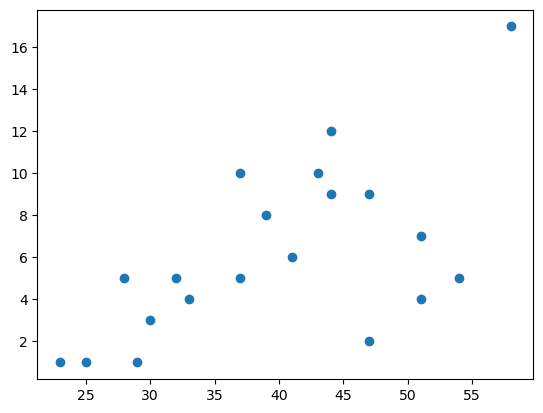

In [11]:
plt.scatter(df['age'],df['experience'])

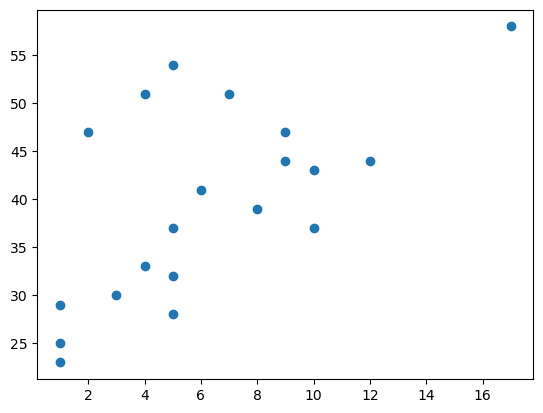

In [12]:
plt.scatter(df['experience'],df['age'])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
print(X_train)
print(X_test)

    age  experience
14   44          12
4    43          10
17   23           1
7    33           4
1    30           3
13   51           4
0    25           1
19   37          10
18   44           9
9    39           8
15   41           6
8    37           5
12   54           5
11   47           9
5    51           7
    age  experience
3    32           5
16   58          17
6    28           5
10   29           1
2    47           2


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)

In [22]:
print(X_train)

[[ 0.45260994  1.76134863]
 [ 0.34131241  1.14692469]
 [-1.88463811 -1.61798304]
 [-0.77166285 -0.69634713]
 [-1.10555543 -1.0035591 ]
 [ 1.23169263 -0.69634713]
 [-1.66204306 -1.61798304]
 [-0.32647274  1.14692469]
 [ 0.45260994  0.83971272]
 [-0.10387769  0.53250075]
 [ 0.11871736 -0.08192319]
 [-0.32647274 -0.38913516]
 [ 1.56558521 -0.38913516]
 [ 0.78650252  0.83971272]
 [ 1.23169263  0.22528878]]


In [23]:
X_test=scaler.transform(X_test)

In [24]:
print(X_test.head())

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regressor=LinearRegression()

In [27]:
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
print(regressor.coef_)
print(regressor.intercept_)

[-806.14213964 6550.42724361]
40681.333333333336


In [30]:
y_pred=regressor.predict(X_test)

In [31]:
print(y_pred[:3]);
print(y_test[:3]);

[38844.12333232 60659.79696274 39203.0098368 ]
3     40130
16    63600
6     41340
Name: income, dtype: int64


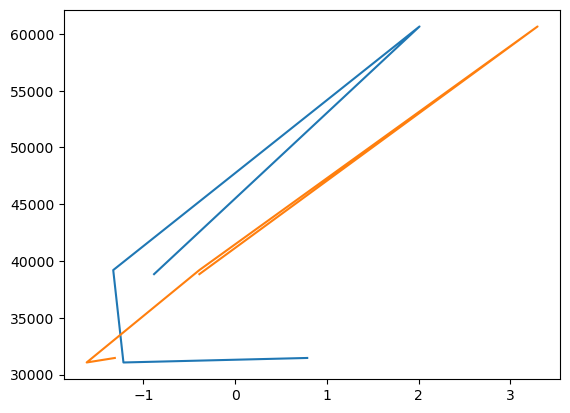

In [32]:
plt.plot(X_test,y_pred)

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
mse=mean_squared_error(y_test,y_pred)
msa=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
R2=r2_score(y_test,y_pred)
print(mse)
print(msa)
print(rmse)
print(R2)

5054412.731557136
1941.1378958330556
2248.202110922667
0.9673277535480097


In [35]:
residual=y_test-y_pred

In [36]:
print(residual)

3     1285.876668
16    2940.203037
6     2136.990163
10   -3223.809574
2      118.810037
Name: income, dtype: float64


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


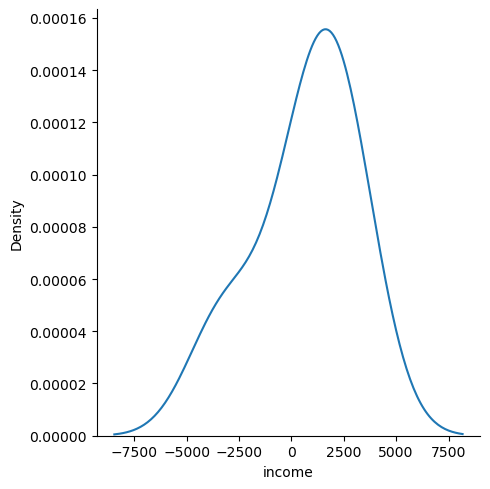

In [38]:
sns.displot(residual,kind='kde')

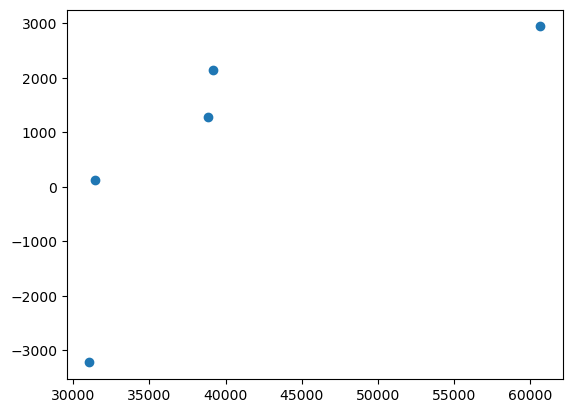

In [40]:
plt.scatter(y_pred,residual)

In [41]:
regressor

LinearRegression()

Pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

## key concept:
Serialization (Pickling): Converting a Python object into a byte stream.
Deserialization (Unpickling): Converting a byte stream back into a Python object.

## when to use pickle
### Saving Machine Learning Models: 
After training a machine learning model, you can save it to disk so that you can load it later for prediction without retraining.
### Intermediate Data: 
Save processed data to avoid recomputation
### Configuration Objects:
Save configuration settings for reuse in other scripts or sessions

In [1]:
import pickle
  

In [2]:
pickle.dump(regressor,open('regression.pkl','wb'))

NameError: name 'regressor' is not defined

In [3]:
model=pickle.load(open('regression.pkl','rb'))

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [4]:
y_pred=model.predict()

NameError: name 'X_test' is not defined

In [ ]:
pickle.dump()